# Packages

In [19]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/federico.bindi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load and prepare data

In [20]:
df_articles = pd.read_csv('_raw/articles_scraped.csv')
df_articles['length'] = df_articles.text.apply(lambda x: len(x))
df_articles

,title,url,tag,text,date,author,length
0,"Firearms, Disappearances, Prison Overcrowding:...",https://insightcrime.org/news/firearms-disappe...,ARMS TRAFFICKING,"From overpopulated, crumbling prisons to tens ...",2023-08-01,CHRIS DALBY,8048
1,Uruguay's Top Trafficker Disappears Yet Again ...,https://insightcrime.org/news/uruguay-traffick...,URUGUAY,Uruguayan drug trafficker Sebastián Marset has...,2023-07-31,CHRISTOPHER NEWTON AND CHRIS DALBY,5949
2,Latin America’s Criminal Bankers: Explaining C...,https://insightcrime.org/news/latin-america-cr...,COLOMBIA,Three cases in recent weeks highlight how Colo...,2023-07-28,ANASTASIA AUSTIN,3876
3,Criminal Groups Ally With State Forces for Cat...,https://insightcrime.org/news/criminal-groups-...,VENEZUELA,An increase in cattle rustling across Venezuel...,2023-07-27,VENEZUELA INVESTIGATIVE UNIT,3462
4,"Shark Fin Trade Thriving in Latin America, Des...",https://insightcrime.org/news/shark-fin-trade-...,ILLEGAL FISHING,With record shark fin seizures continuing acro...,2023-07-26,MARÍA FERNANDA RAMÍREZ AND CHRIS DALBY,5030
...,...,...,...,...,...,...,...
10777,"20,000 Migrants Kidnapped per year in Mexico",https://insightcrime.org/news/analysis/20000-m...,HUMAN TRAFFICKING,Twenty thousand migrants per year are kidnappe...,2010-10-31,INSIGHT CRIME,440
10778,Colombia Government: 152 Gangs in Medellin,https://insightcrime.org/news/analysis/colombi...,COLOMBIA,Colombian authorities have indentified 152 gan...,2010-10-31,INSIGHT CRIME,715
10779,"Uruguay's Security Minister: ""Feudalization"" o...",https://insightcrime.org/news/analysis/uruguay...,BRAZIL,"In an academic forum in Montevideo, Uruguay’s ...",2010-10-31,INSIGHT CRIME,421
10780,17 Dead in Honduras Gang Massacre,https://insightcrime.org/news/analysis/17-dead...,HONDURAS,Honduras is seeing the fallout from Tuesday’s ...,2010-09-09,INSIGHT CRIME,1334


# Graphs

In [21]:
'''plot = (
    ggplot(df, aes(x='length',fill='lang'))
    + geom_histogram(binwidth=10, alpha=0.7, position='identity')
    + theme_minimal()
    + labs(title='Article length frequency',x='',y='')
)
print(f"EN article length mean: {df[df.lang=='en'].length.mean()} median: {df[df.lang=='en'].length.median()}")
print(f"ES article length mean: {df[df.lang=='es'].length.mean()} median: {df[df.lang=='es'].length.median()}")
print(plot)'''

'plot = (\n    ggplot(df, aes(x=\'length\',fill=\'lang\'))\n    + geom_histogram(binwidth=10, alpha=0.7, position=\'identity\')\n    + theme_minimal()\n    + labs(title=\'Article length frequency\',x=\'\',y=\'\')\n)\nprint(f"EN article length mean: {df[df.lang==\'en\'].length.mean()} median: {df[df.lang==\'en\'].length.median()}")\nprint(f"ES article length mean: {df[df.lang==\'es\'].length.mean()} median: {df[df.lang==\'es\'].length.median()}")\nprint(plot)'

# Exploratory sentiment analysis of articles

In [22]:
def analyze_sentiment(text):
    sentiment_analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = sentiment_analyzer.polarity_scores(text)
    if sentiment_scores["compound"] > 0.2:
        category = "Positive (Allies)"
    elif sentiment_scores["compound"] < -0.2:
        category =  "Negative (Rivals)"
    else:
        category = "Neutral"
    
    return sentiment_scores["compound"], category

In [23]:
df_articles['sent_score'] = df_articles['text'].apply(lambda x: analyze_sentiment(x)[0])
df_articles['sentiment'] = df_articles['text'].apply(lambda x: analyze_sentiment(x)[1])

(array([8818.,    0.,    0.,    0.,    0.,  279.,    0.,    0.,    0.,
        1685.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

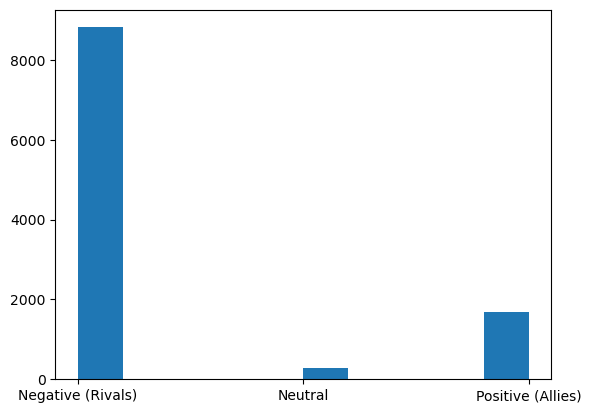

In [24]:
plt.hist(df_articles.sentiment)

nltk vader does not capture sarcasm (it's based on a pre-defined lexicon) but InsightCrime articles do not contain sarcasm (most likely)